<a href="https://colab.research.google.com/github/Sharif1813/Data-Science/blob/main/project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tweepy
import pandas as pd 
import re    
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Accessing Tweeter data

In [ ]:
CONSUMER_KEY = "dN17wS3ZokJY26wluGIlBLrNX"
CONSUMER_SECRET = "7oe94klCPukbgpkFPUrBwliO91dUNGgJFMURVnQzyEvvzcPTkM"
BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAAKhDiwEAAAAA45Mx5cHp0gafv6idQ0TUaxJwdss%3DIXzRfxs49BbAnU0gcFh37wsRybl9wFLd0v3P46sewrq3e6oExi"
ACCESS_TOKEN = "1584072828898484226-B44qllLp0HNluXqWfWT4SXEgcPFsnn"
ACCESS_TOKEN_SECRET = "jpKNn4iIjZOsknkiIuDbQAsKJAR2iM5qaNxELDMyEByPu"

In [ ]:
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

api = tweepy.API(auth, wait_on_rate_limit= True)
tweet = api.geo_id
print(tweet)

<function bind_api.<locals>._call at 0x7f990aa61f80>


Data about Inflation

In [ ]:
search_term = '#inflation -filter:retweets'
tweets = tweepy.Cursor(api.search, q=search_term,lang= 'en', tweet_mode='extended',since="2020-06-01").items(10000)
Inflation = [{'Tweets':tweet.full_text, 'Time Stamp':tweet.created_at}for tweet in tweets]
print(Inflation)

[{'Tweets': 'Oops. \n#VoteRed #RedWave #inflation #Democrats https://t.co/R5TLRYILJR', 'Time Stamp': datetime.datetime(2022, 11, 8, 16, 31, 55)}, {'Tweets': 'With growth in many large economies stalling and debts mounting, “rapid and/or sustained #inflation” and “debt crises” featured among the top ten #risks in every region. Learn more from my colleague Richard Smith-Bingham and @CarolinaKlint: https://t.co/dFmaNUDvQJ #economy', 'Time Stamp': datetime.datetime(2022, 11, 8, 16, 31, 33)}, {'Tweets': 'Call/Whatsapp us today ☎️ \n\n+2347031211154\n+2348054461369\n\n#groundsandcribs #realestate #realtor #realestatelagos #realestatetips #realestateinvestment\n#lagos #abuja #portharcourt #nigeriansinuk #nigeriansinus #nigeriansincanada #knowledge #quotes #land #inflation', 'Time Stamp': datetime.datetime(2022, 11, 8, 16, 31, 12)}, {'Tweets': "My latest substack discusses several crises facing the #Eurozone inc. #Germany's #EnergyCrisis, #FarmersProtest in #France, #Netherlands, record #infla

In [ ]:
df= pd.DataFrame(Inflation)
df.head(500)    

,Tweets,Time Stamp
0,Oops. \n#VoteRed #RedWave #inflation #Democrat...,2022-11-08 16:31:55
1,With growth in many large economies stalling a...,2022-11-08 16:31:33
2,Call/Whatsapp us today ☎️ \n\n+2347031211154\n...,2022-11-08 16:31:12
3,My latest substack discusses several crises fa...,2022-11-08 16:31:04
4,"""A demand for more cat coverage as valuations ...",2022-11-08 16:30:22
...,...,...
495,@RBReich @pgammo If you take all the billionai...,2022-11-08 12:57:13
496,"@lisaabramowicz1 Europe, UK, US and elsewhere ...",2022-11-08 12:57:02
497,"Ok #twitter, remember the @GOP doesn't have a ...",2022-11-08 12:56:59
498,@D_Blanchflower Baroness Thatcher believed #un...,2022-11-08 12:56:53


In [ ]:
def filtering(tw):
  tw = re.sub('#inflation','inflation',tw)
  tw = re.sub('#[A-Za-z0-9]+','',tw)
  tw = re.sub('\\n','',tw)
  tw = re.sub('@user','',tw)
  tw = re.sub('https?:\/\/\S+','',tw)
  return tw

In [ ]:
df['Filtered Tweets1'] = df['Tweets'].apply(filtering)
df.head(10)

,Tweets,Time Stamp,Filtered Tweets1
0,Oops. \n#VoteRed #RedWave #inflation #Democrat...,2022-11-08 16:31:55,Oops. inflation
1,With growth in many large economies stalling a...,2022-11-08 16:31:33,With growth in many large economies stalling a...
2,Call/Whatsapp us today ☎️ \n\n+2347031211154\n...,2022-11-08 16:31:12,Call/Whatsapp us today ☎️ +2347031211154+23480...
3,My latest substack discusses several crises fa...,2022-11-08 16:31:04,My latest substack discusses several crises fa...
4,"""A demand for more cat coverage as valuations ...",2022-11-08 16:30:22,"""A demand for more cat coverage as valuations ..."
5,Midterms: What Have ‘Climate Hell’ and Inflati...,2022-11-08 16:30:11,Midterms: What Have ‘Climate Hell’ and Inflati...
6,"Given market #volatility, #GICs might be OK sh...",2022-11-08 16:30:11,"Given market , might be OK short term, but no..."
7,#SriLanka is in 5th place in this week's infla...,2022-11-08 16:30:01,is in 5th place in this week's inflation roun...
8,The White House tells me the President's polic...,2022-11-08 16:29:53,The White House tells me the President's polic...
9,@POTUS The Economy is in trouble\nGov't Debt /...,2022-11-08 16:29:24,@POTUS The Economy is in troubleGov't Debt / D...


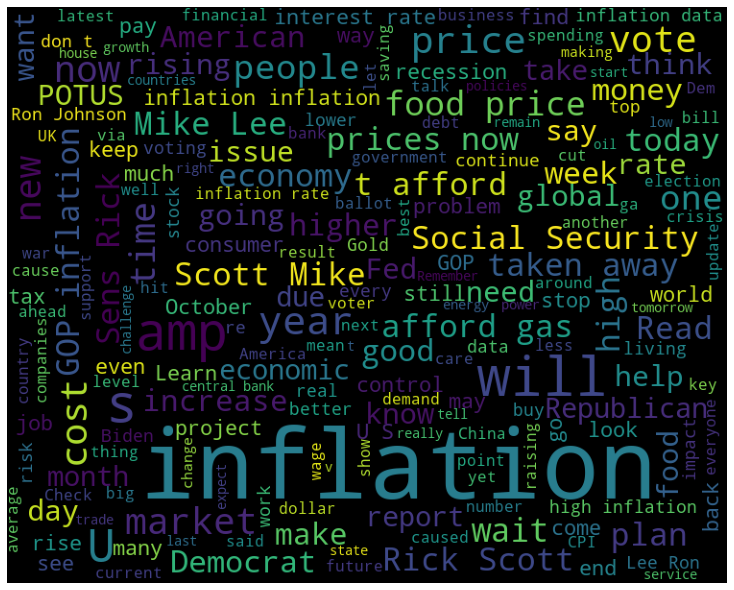

In [ ]:
allwords = ' '.join([tweets for tweets in df['Filtered Tweets1']])
stopwords = set(STOPWORDS)
wordCloud = WordCloud(width = 750, height=600,stopwords = stopwords, random_state = 21,
                max_font_size=100).generate(allwords)
#plt.imshow(wordCloud, interpolation="bilinear")
#plt.axis('off')
#plt.show()
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordCloud)
plt.axis("off")
plt.tight_layout(pad = 0)

Segment to find the reason of inflation

In [ ]:
search_term = '#inflation reason -filter:retweets'
tweets = tweepy.Cursor(api.search, q=search_term, lang = "en",since="2020-06-01").items(10000)
reasons = [{'Tweets':tweet.text, 'Time Stamp':tweet.created_at}for tweet in tweets]
print(reasons)

[{'Tweets': '#Inflation \n"The major reason for inflation today is the outrageous level of corporate greed." \nIt\'s a man-made inf… https://t.co/Cgpg1RPdr1', 'Time Stamp': datetime.datetime(2022, 11, 8, 15, 36, 48)}, {'Tweets': 'If you wonder why things cost more, one reason is #fakeshortages caused by #elites creating these issue.… https://t.co/kf070X2Ozl', 'Time Stamp': datetime.datetime(2022, 11, 8, 14, 53, 43)}, {'Tweets': 'https://t.co/K2PoXDp39Q Here you go #Millennials , this is the main reason for #INFLATION now #VoteBlueToEndTheInsanity', 'Time Stamp': datetime.datetime(2022, 11, 8, 14, 24, 29)}, {'Tweets': 'Explicit wage indexation on #inflation gets a lot of traction, but consumer services have started reintroducing exp… https://t.co/TY2cwQrqGJ', 'Time Stamp': datetime.datetime(2022, 11, 8, 8, 0, 3)}, {'Tweets': 'As #FederalReserve officials made a 4th supersize interest rate hike to stamp down #inflation, 88 chief executives… https://t.co/RfmEbKqe3w', 'Time Stamp': datetim

In [ ]:
dr= pd.DataFrame(reasons)
dr.head(500)  

,Tweets,Time Stamp
0,"#Inflation \n""The major reason for inflation t...",2022-11-08 15:36:48
1,"If you wonder why things cost more, one reason...",2022-11-08 14:53:43
2,https://t.co/K2PoXDp39Q Here you go #Millennia...,2022-11-08 14:24:29
3,Explicit wage indexation on #inflation gets a ...,2022-11-08 08:00:03
4,As #FederalReserve officials made a 4th supers...,2022-11-08 04:43:33
...,...,...
124,The reason the U.S. has a lower #inflation rat...,2022-10-31 16:32:59
125,If it seems like #inflation is on everyone’s m...,2022-10-31 15:59:59
126,"🚨 ""Americans have good reason to worry about r...",2022-10-31 14:13:35
127,McKinsey report.\n56% of Americans intend to g...,2022-10-31 12:50:26


In [ ]:
def filtering(tw):
  tw = re.sub('#inflation reason','reason of inflation',tw)
  tw = re.sub('#[A-Za-z0-9]+','',tw)
  tw = re.sub('\\n','',tw)
  tw = re.sub('@user','',tw)
  tw = re.sub('https?:\/\/\S+','',tw)
  return tw

In [ ]:
dr['Filtered Tweets2'] = dr['Tweets'].apply(filtering)
dr.head(10)

,Tweets,Time Stamp,Filtered Tweets2,Subjectivity,Polarity,Sentiment
0,"#Inflation \n""The major reason for inflation t...",2022-11-08 15:36:48,"""The major reason for inflation today is the ...",0.500000,-0.312500,Down
1,"If you wonder why things cost more, one reason...",2022-11-08 14:53:43,"If you wonder why things cost more, one reason...",0.500000,0.500000,Up
2,https://t.co/K2PoXDp39Q Here you go #Millennia...,2022-11-08 14:24:29,"Here you go , this is the main reason for now",0.333333,0.166667,Up
3,Explicit wage indexation on #inflation gets a ...,2022-11-08 08:00:03,Explicit wage indexation on gets a lot of tra...,0.000000,0.000000,Neutral
4,As #FederalReserve officials made a 4th supers...,2022-11-08 04:43:33,As officials made a 4th supersize interest ra...,0.288889,-0.155556,Down
5,I don't believe YOU! YOU are the reason gas p...,2022-11-08 00:21:25,I don't believe YOU! YOU are the reason gas p...,0.500000,0.312500,Up
6,2/ It is also the PRIMARY reason Humans conti...,2022-11-07 22:44:47,2/ It is also the PRIMARY reason Humans conti...,0.412500,-0.087500,Down
7,The reason I believed the #market would rally ...,2022-11-07 20:00:54,The reason I believed the would rally is beca...,0.383333,0.100000,Up
8,Refinitiv | #EURUSD 🇪🇺\n\n&gt; #EURUSD rallied...,2022-11-07 19:11:21,Refinitiv | 🇪🇺&gt; rallied above the daily i...,0.175000,0.125000,Up
9,GOP will have you believe Biden is the cause o...,2022-11-07 19:01:13,GOP will have you believe Biden is the cause o...,0.000000,0.000000,Neutral


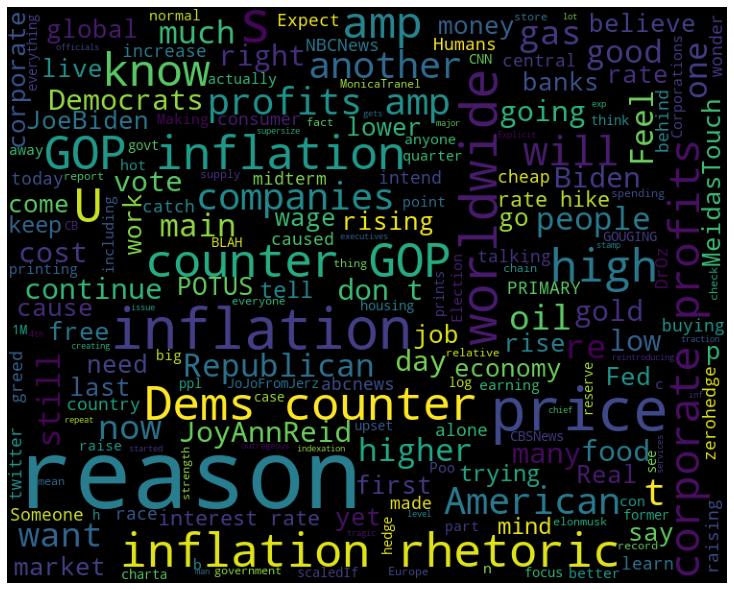

In [ ]:
allwords = ' '.join([tweets for tweets in dr['Filtered Tweets2']])
stopwords = set(STOPWORDS)
wordCloud = WordCloud(width = 750, height=600,stopwords = stopwords, random_state = 21,
                max_font_size=100).generate(allwords)
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordCloud)
plt.axis("off")
plt.tight_layout(pad = 0)

Segment of Recession

In [ ]:
search_term = '#recession -filter:retweets'
Ctweets = tweepy.Cursor(api.search, q=search_term, tweet_mode='extended', lang = "en",since="2020-06-01").items(10000)
all_recTw = [{'Tweets':tweet.full_text,'Time Stamp':tweet.created_at}for tweet in Ctweets]
print(all_recTw)

[{'Tweets': 'As tech rallies…#oil stocks will sell off.\n\n#stocks #trading #tradingtips #stockmarket #nvda #aapl #options #optionstrade #amc #gme #bearmarket #bearmarket2022 #recession #inflation', 'Time Stamp': datetime.datetime(2022, 11, 8, 16, 27, 56)}, {'Tweets': 'Breaking news. @BerkshireHathaway reports almost $1.6 BILLION value in derivative put contracts. $BRK #recession #bearmarket #hedging #derivatives #trading #WarrenBuffett #10Q https://t.co/YWf9ECpsJV', 'Time Stamp': datetime.datetime(2022, 11, 8, 16, 23, 56)}, {'Tweets': 'New York Times opinion (Peter Coy): In July, yields on two-year Treasury notes broke above yields on 10-year notes, and the differential has steadily grown. The last time this happened was the eve of the deep #recession  of 2007 to 2009.', 'Time Stamp': datetime.datetime(2022, 11, 8, 16, 22, 8)}, {'Tweets': 'Cyclical sectors and Small-cap stocks have beaten $SPX in recent months. The overall market’s doggedness, of late, is partly due to cyclicals and s

In [ ]:
dk= pd.DataFrame(all_recTw)
dk.head(500)  

,Tweets,Time Stamp
0,As tech rallies…#oil stocks will sell off.\n\n...,2022-11-08 16:27:56
1,Breaking news. @BerkshireHathaway reports almo...,2022-11-08 16:23:56
2,"New York Times opinion (Peter Coy): In July, y...",2022-11-08 16:22:08
3,Cyclical sectors and Small-cap stocks have bea...,2022-11-08 16:19:01
4,#recession ... #Tech Bubble 2.0 edition https:...,2022-11-08 16:14:22
...,...,...
495,New Video\n\nhttps://t.co/sikDHrz4UQ\n\n#Inves...,2022-11-07 19:32:43
496,@TikTokInvestors And the #recession will bankr...,2022-11-07 19:27:11
497,@POTUS Not even a little bit misleading #COVID...,2022-11-07 19:26:48
498,@POTUS You haven’t created a single job.\n\nUn...,2022-11-07 19:26:30


In [ ]:
def filtering(tw):
  tw = re.sub('#recesion','reason of recession',tp)
  tw = re.sub('#[A-Za-z0-9]+','',tp)
  tw = re.sub('\\n','',tp)
  tw = re.sub('@user','',tp)
  tw = re.sub('https?:\/\/\S+','',tp)
  return tw

In [ ]:
dk['Filtered Tweets2'] = dk['Tweets'].apply(filtering)
dk.head(10)

NameError: ignored

In [ ]:
allwords = ' '.join([tweete for tweete in dk['Filtered Tweets3']])
stopwords = set(STOPWORDS)
wordCloud = WordCloud(width = 800, height=500,stopwords = stopwords, background_color='white',
        max_words=300, random_state = 21,
                max_font_size=120).generate(allwords)

plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordCloud)
plt.axis("off")
plt.tight_layout(pad = 0)

Reasons of Inflation Analysis

In [ ]:
def getSubjectivityF(twt):
  return TextBlob(twt).sentiment.subjectivity

def getPolarityF(twt):
  return TextBlob(twt).sentiment.polarity  

dr['Subjectivity'] = dr['Filtered Tweets2'].apply(getSubjectivityF)

dr['Polarity'] = dr['Filtered Tweets2'].apply(getPolarityF)

In [ ]:
def getSentiment(score):
  if score < 0:
    return 'Down'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Up'

In [ ]:
dr['Sentiment'] = dr['Polarity'].apply(getSentiment)
dr.tail()

In [ ]:
for i in range(0, dr.shape[0]):
  plt.scatter(dr['Polarity'][i], dr['Subjectivity'][i], color='blue')
plt.title('Reason of recession')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
dr['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar plot')
plt.xlabel('Sentiment')
plt.ylabel('No of tweets')
plt.show()

In [ ]:
fig = plt.figure(figsize=(8,8))
colors = ("black", "blue", "yellow")
tags = dr['Sentiment'].value_counts()

explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, explode = explode, label='')

plt.title('Percentage of reson of inflation.')

In [ ]:
neg_tweets = dr[dr.Sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['Polarity'], ascending= False)
neg_tweets.head()


In [ ]:
vect = CountVectorizer(ngram_range=(1,2)).fit(dr['Tweets'])

In [ ]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 15 features:\n {}".format(feature_names[:15]))

In [ ]:
X = dr['Tweets']
Y = dr['Sentiment']
X = vect.transform(X)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("The accuracy is around: {:.2f}%".format(logreg_acc*100))

In [ ]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))